In [406]:
from IPython.display import display, Math, Markdown, HTML

from math import *
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["errorbar.capsize"] = 2
plt.rcParams["savefig.dpi"] = 200
# plt.rcParams["savefig.bbox"] = "tight"
# plt.rcParams["savefig.pad_inches"] = 0.01
plt.rcParams["savefig.format"] = "pdf"

from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.unumpy import uarray
from uncertainties.unumpy import nominal_values as unominal
from uncertainties.unumpy import std_devs as ustdev

def display_ufloat(uf, var=None, dim=None):
    res = ''
    if var is not None:
        res += var + '='
    res += f"{uf:L}"
    if dim is not None:
        res += ' \\ ' + dim
    display(Math(res))

# Свободные и вынужденные колебания в электрическом контуре

**Цель работы:** исследование свободных и вынужденных колебаний в колебательном контуре.

**В работе используются:** осциллограф АКТАКОМ ADS-6142H, генератор сигналов специальной формы АКИП-3409/4, магазин сопротивления МСР-60, магазин емкости Р5025, магазин индуктивности Р567 типа МИСП, соединительная коробка с шунтирующей емкостью, соединительные одножильные и коаксиальные провода.

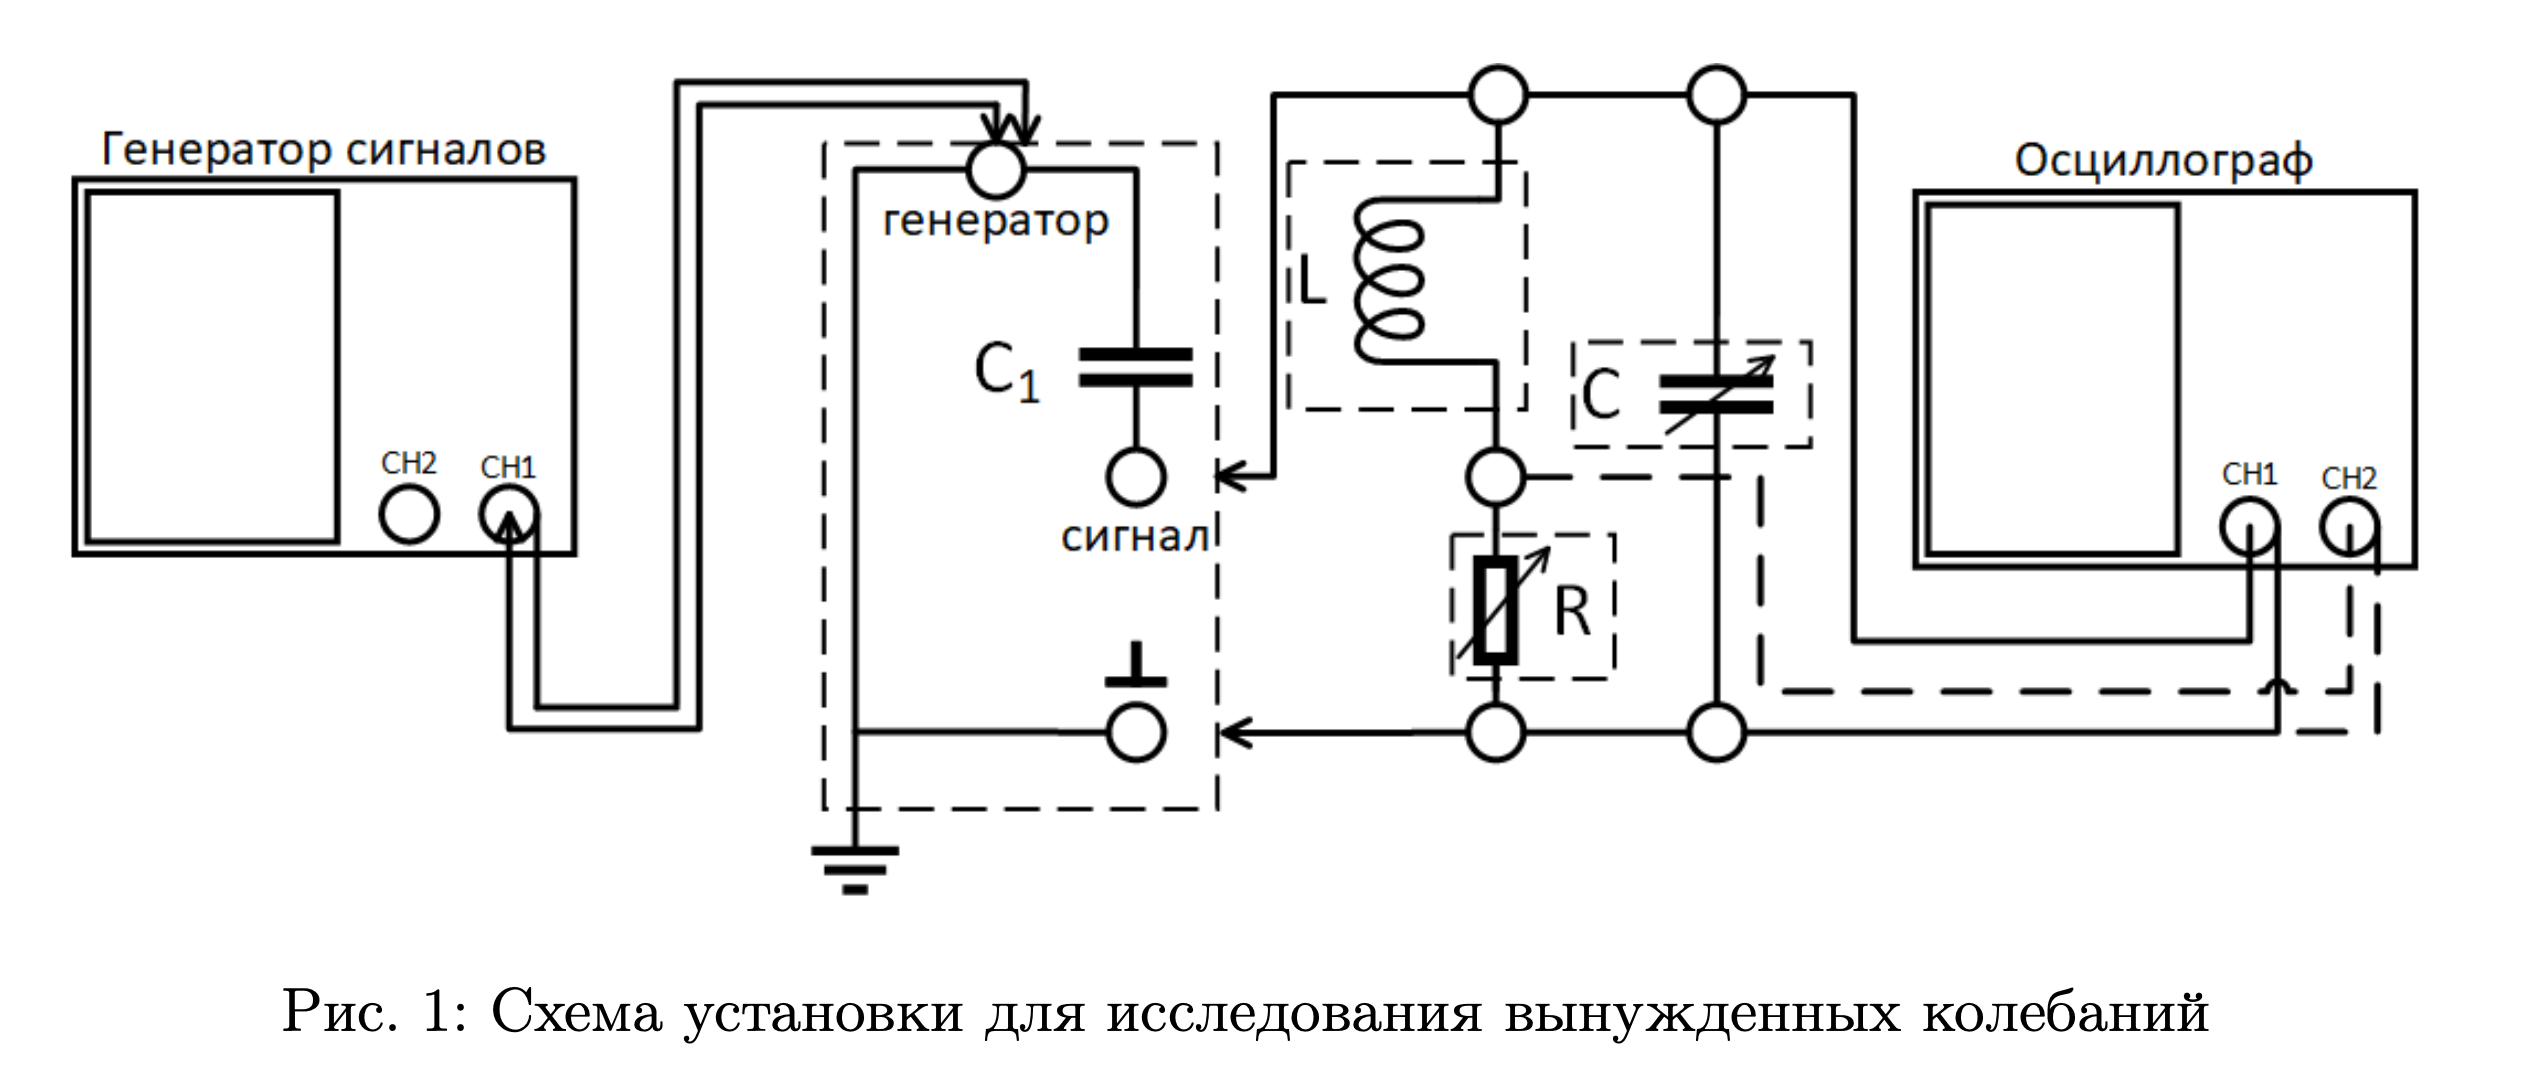
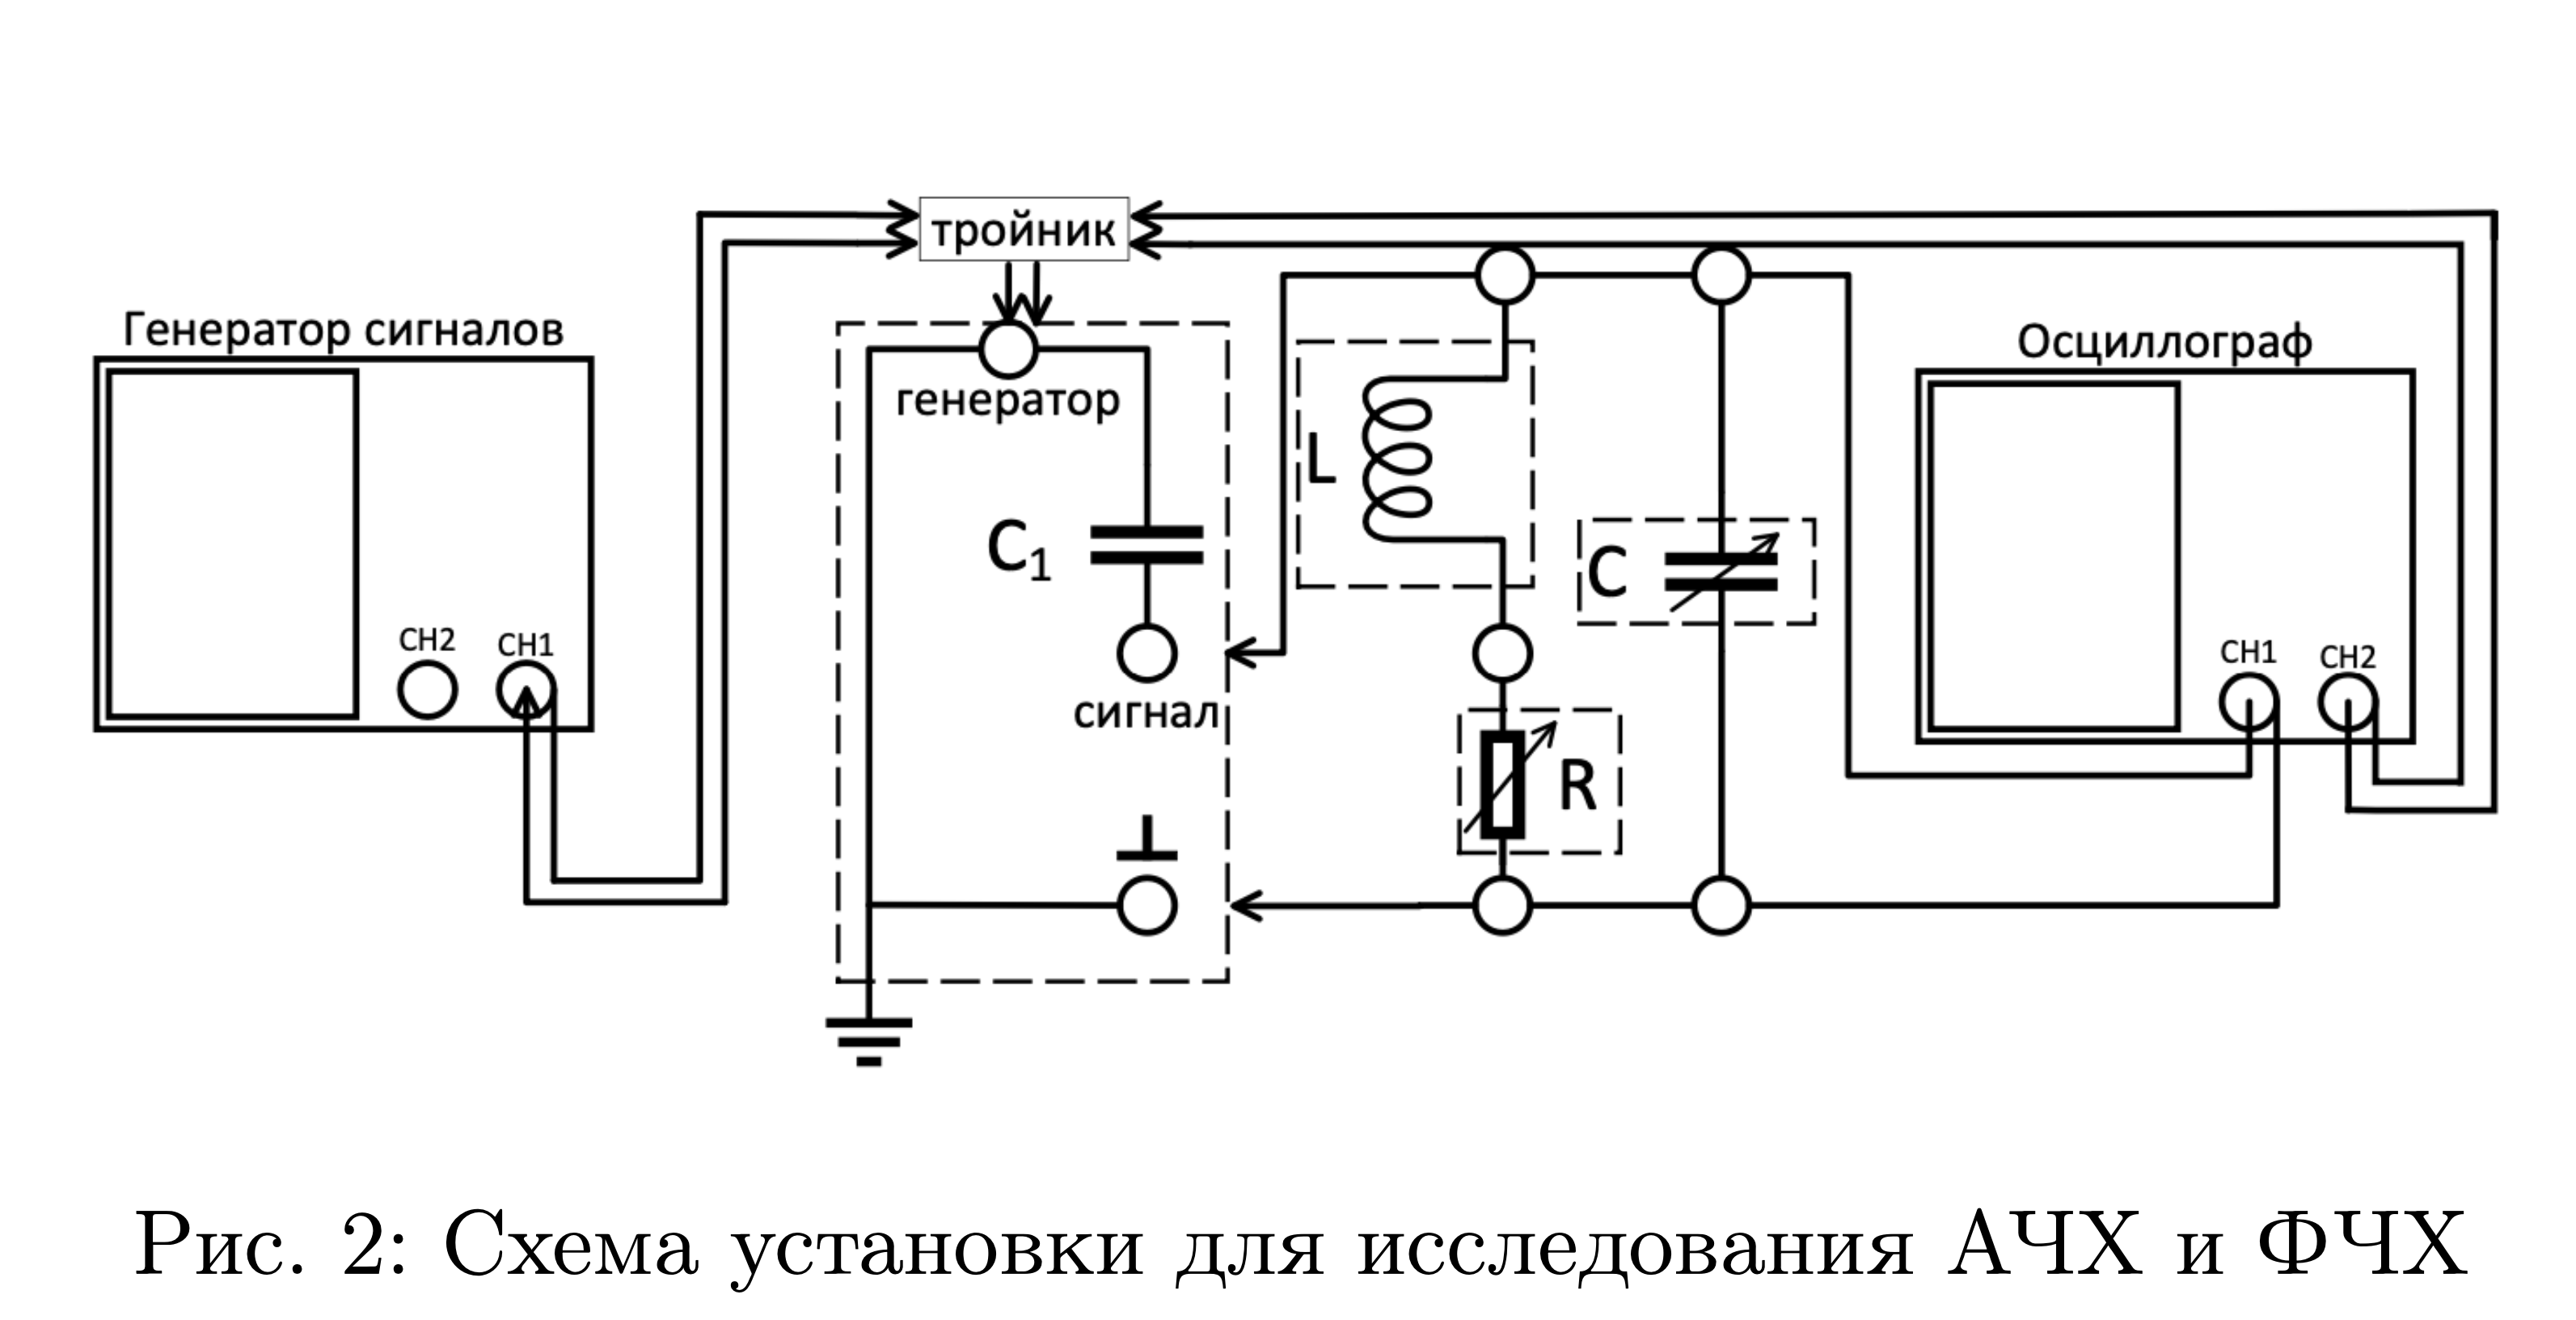

### **2.1 Подготовка приборов к работе**

In [407]:
nu_measured = [50, 500, 1500]
L_measured = [100.14, 100.10, 100.11]
R_measured = [28.641, 28.916, 30.245]

L = ufloat(np.mean(L_measured), np.std(L_measured)) * 1e-3  # Гн
R_L = ufloat(np.mean(R_measured), np.std(R_measured))  # Ом

### **2.2 Измерение периодов свободных колебаний**

In [408]:
T0 = ufloat(66, 1) * 1e-6  # с
C0 = (T0 / (2 * np.pi)) ** 2 / L  # Ф

C0

1.1021019043100297e-09+/-3.339755151082237e-11

In [409]:
C_exp = uarray([0.002, 0.004, 0.006, 0.008, 0.009], 0.001 / 2) * 1e-6  # Ф
C_exp += C0
T_exp = uarray([111, 142, 167, 190, 200], 1) * 1e-6  # с

### **2.3 Критическое сопротивление и декремент затухания**

In [410]:
nu0 = 6.5e3  # Гц
C_star = (nu0 * 2 * np.pi) ** -2 / L  # Ф
R_cr = 2 * (L / C_star) ** 0.5  # Ом

display(C_star)
display(R_cr)

5.988349901978525e-09+/-1.0166376895093684e-12

8177.670397049353+/-1.3883169945160674

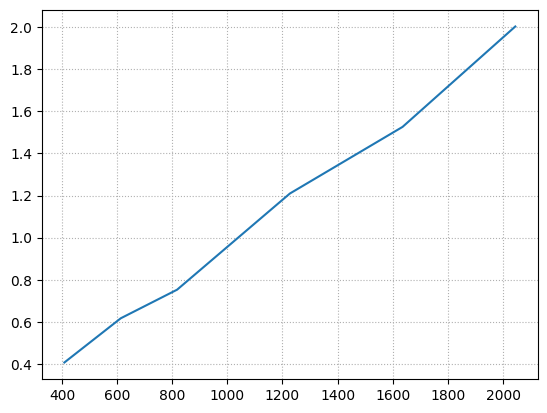

In [411]:
R = uarray([0.05, 0.075, 0.10, 0.15, 0.20, 0.25], 0.01 /2) * R_cr
n3 = np.array([3, 3, 3, 2, 1, 1])
U_m3 = uarray([664, 636, 612, 584, 552, 504], 5)
U_mpn3 = uarray([196, 100, 64, 52, 120, 68], 5)

Theta3 = 1 / n3 * unp.log(U_m3 / U_mpn3)

plt.plot(unominal(R), unominal(Theta3))
plt.show()

### **2.4 Свободные колебания на фазовой плоскости**

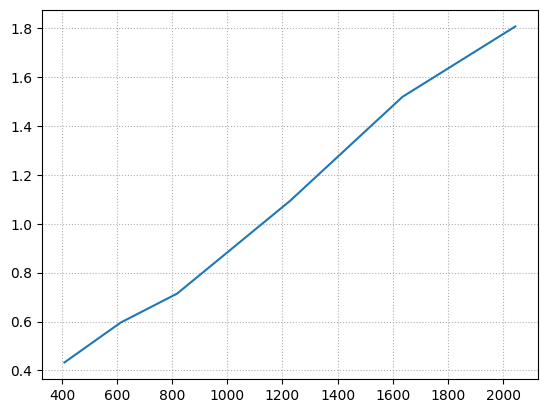

In [412]:
n = np.array([3, 2, 1, 1, 1, 1])
U_m4 = uarray([783, 708, 764, 725, 640, 640], 5)
U_mpn4 = uarray([214, 215, 374, 243, 140, 105], 5)

Theta4 = 1 / n * unp.log(U_m4 / U_mpn4)

plt.plot(unominal(R), unominal(Theta4))
plt.show()

<p float="left">
  <img src="images/1.jpeg" width="475" />
  <img src="images/2.jpeg" width="475" />
  <img src="images/3.jpeg" width="475" />
  <img src="images/4.jpeg" width="475" />
  <img src="images/5.jpeg" width="475" />
  <img src="images/6.jpeg" width="475" />
</p>

### **2.5 Исследование резонансных кривых**

In [413]:
nu_cr_expr = 5.97e3  # Гц

In [414]:
nu_min = ufloat(5.25, 0.01) * 1e3
nu_max = ufloat(7.16, 0.01) * 1e3

dU = 0.05
ddx = 0.001

In [415]:
nu1_up = nu_min + (-(nu_min - nu_cr_expr) / 10) * np.array(range(11))
U_max1_up = uarray([6.32, 6.96, 7.76, 8.64, 9.68, 10.88, 12.16, 13.44, 14.80, 15.76, 16.24], dU) / 2
dx1_up = uarray([0.113, 0.112, 0.113, 0.113, 0.113, 0.115, 0.115, 0.119, 0.121, 0.124, 0.129], ddx)

nu1_dn = (nu_cr_expr + ((nu_max - nu_cr_expr) / 10) * np.array(range(11)))[1:]
U_max1_dn = uarray([15.76, 14.24, 12.56, 11.12, 9.84, 8.72, 8.00, 7.28, 6.80, 6.32], dU) / 2
dx1_dn = uarray([0.135, 0.139, 0.140, 0.140, 0.140, 0.140, 0.135, 0.136, 0.136, 0.136], ddx)

nu1 = np.concatenate([nu1_up, nu1_dn])
U_max1 = np.concatenate([U_max1_up, U_max1_dn])
dx1 = np.concatenate([dx1_up, dx1_dn]) * 1e-3


In [416]:
nu2_up = nu_min + (-(nu_min - nu_cr_expr) / 3) * np.array(range(4))
U_max2_up = uarray([3.42, 3.78, 4.02, 4.20], dU) / 2
dx2_up = uarray([0.147, 0.143, 0.140, 0.138], ddx)

nu2_dn = (nu_cr_expr + ((nu_max - nu_cr_expr) / 3) * np.array(range(4)))[1:]
U_max2_dn = uarray([4.30, 4.24, 4.06], dU) / 2
dx2_dn = uarray([0.136, 0.131, 0.127], ddx)

nu2 = np.concatenate([nu2_up, nu2_dn])
U_max2 = np.concatenate([U_max2_up, U_max2_dn])
dx2 = np.concatenate([dx2_up, dx2_dn]) * 1e-3


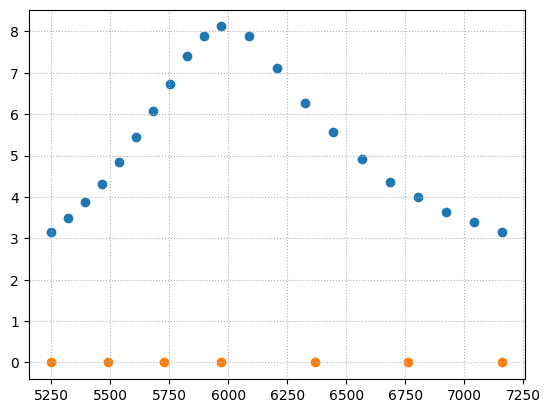

In [417]:
plt.scatter(unominal(nu1), unominal(U_max1))
plt.scatter(unominal(nu2), unominal(dx2))

### **2.6 Процессы установления и затухания**

In [418]:
R1 = R[0]

U01 = uarray([7.64, 7.64, 7.64], 0.05 / 2)
n61 = np.array([2, 3, 4])
U_k61 = uarray([2.92, 2.92, 2.92], 0.05 / 2)
U_kpn61 = uarray([5.64, 6.40, 6.80], 0.05 / 2)

Theta61 = -1 / n61 * unp.log(U_k61 / U_kpn61)

In [419]:
R2 = R[-1]

U02 = uarray([2.04, 2.04, 2.04], 0.05 / 2)
n62 = np.array([1, 2, 3])
U_k62 = uarray([0.72, 0.72, 0.72], 0.05 / 2)
U_kpn62 = uarray([1.74, 1.96, 2.04], 0.05 / 2)

Theta62 = -1 / n62 * unp.log(U_k62 / U_kpn62)

### **2.7 Обработка результатов**

#### 1.

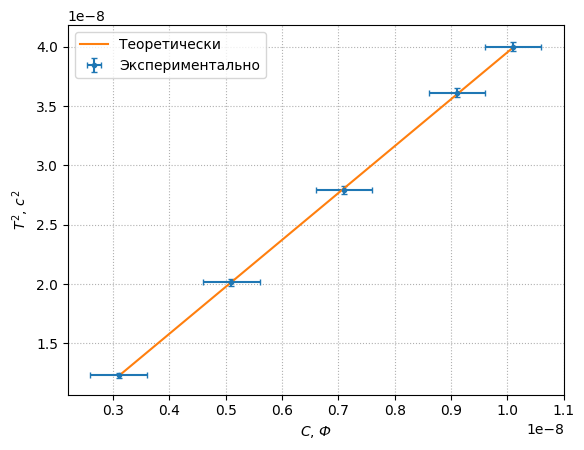

In [420]:
plt.xlabel(r"$C$, $Ф$")
plt.ylabel(r"$T^2$, $с^2$")

plt.errorbar(unominal(C_exp), unominal(T_exp ** 2), xerr=ustdev(C_exp), yerr=ustdev(T_exp ** 2), fmt=".", label="Экспериментально")

C_theor = np.linspace(min(unominal(C_exp)), max(unominal(C_exp)), 100)
T_theor = 2 * np.pi * (L * C_theor) ** 0.5
X2, Y2, X2_err, Y2_err = unominal(C_theor), unominal(T_theor ** 2), ustdev(C_theor), ustdev(T_theor ** 2)
plt.plot(X2, Y2, '-', label="Теоретически")
# plt.fill_between(X2, Y2 - Y2_err, Y2 + Y2_err, alpha=0.2)

plt.legend()
plt.show()


#### 2.

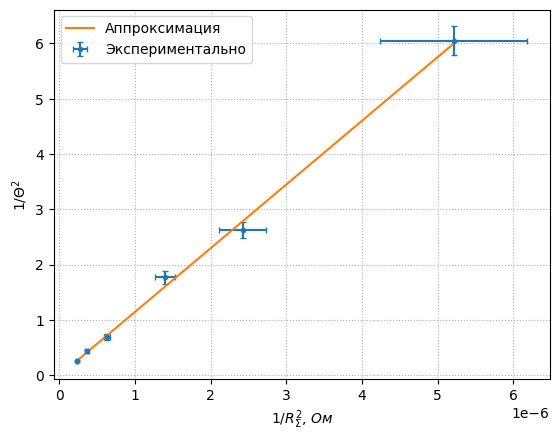

In [421]:
plt.xlabel(r"$1 / R_{\Sigma}^2$, $Ом$")
plt.ylabel(r"$1 / \Theta^2$")

R_Sigma = R_L + R
X = 1 / R_Sigma ** 2
Y = 1 / Theta3 ** 2
plt.errorbar(unominal(X), unominal(Y), xerr=ustdev(X), yerr=ustdev(Y), fmt=".", label="Экспериментально")

func = lambda x, a, b: a * x + b
popt, pcov = curve_fit(func, unominal(X), unominal(Y), sigma=ustdev(Y))
perr = np.sqrt(np.diag(pcov))

a = ufloat(popt[0], perr[0])
b = ufloat(popt[1], perr[1])
plt.plot(unominal(X), unominal(func(X, a, b)), label="Аппроксимация")

plt.legend()
plt.show()

In [422]:
R_cr_exp = 2 * np.pi * a ** 0.5

display_ufloat(R_cr_exp, r"R_{\text{cr}}^{\text{exp}}", "Ом")

<IPython.core.display.Math object>

#### 3.

In [423]:
display_ufloat(R_cr, r"R_{\text{cr}}^{\text{theor}}", "Ом")

<IPython.core.display.Math object>

#### 4.

In [424]:
Q3 = np.pi / Theta3
min(Q3), max(Q3)

(1.5683899751533685+/-0.058094717437200835,
 7.7241674082546465+/-0.16837873129048828)

#### 5.

In [425]:
Q4 = np.pi / Theta4
min(Q4), max(Q4)

(1.7380796962860796+/-0.04640211456292475,
 7.265720555614953+/-0.13567053357303063)

#### 6.

In [426]:
Q_theor = (L / C_star) ** 0.5 / R_Sigma
min(Q_theor), max(Q_theor)

(1.9717726325023746+/-0.03888457651066942,
 9.33202610195712+/-0.8709948642330753)

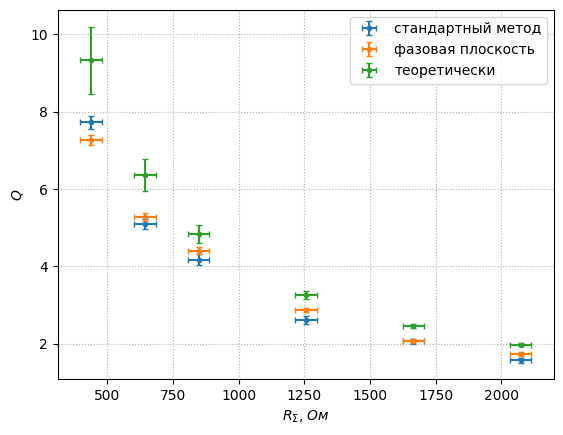

In [427]:
plt.xlabel(r"$R_{\Sigma}$, $Ом$")
plt.ylabel(r"$Q$")

plt.errorbar(unominal(R_Sigma), unominal(Q3), xerr=ustdev(R_Sigma), yerr=ustdev(Q3), fmt=".", label="стандартный метод")
plt.errorbar(unominal(R_Sigma), unominal(Q4), xerr=ustdev(R_Sigma), yerr=ustdev(Q4), fmt=".", label="фазовая плоскость")
plt.errorbar(unominal(R_Sigma), unominal(Q_theor), xerr=ustdev(R_Sigma), yerr=ustdev(Q_theor), fmt=".", label="теоретически")

plt.legend()
plt.show()

#### 7.

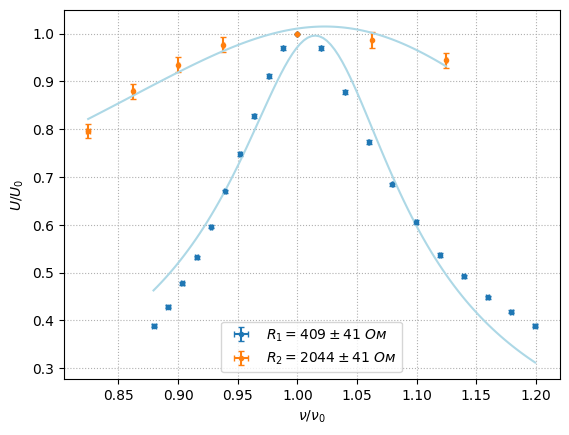

In [428]:
def handle(X, Y, label=""):
    X = X / X[np.argmax(Y)]
    Y = Y / max(Y)
    plt.errorbar(unominal(X), unominal(Y), xerr=ustdev(X), yerr=ustdev(Y), fmt=".", label=label)

    func = lambda omega, omega0, X0, gamma: X0 / ((omega ** 2 - omega0 ** 2) ** 2 + 4 * (omega * gamma) ** 2) ** 0.5
    popt, pcov = curve_fit(func, unominal(X), unominal(Y))
    perr = np.sqrt(np.diag(pcov))

    x_plot = np.linspace(unominal(X).min(), unominal(X).max(), 100)
    plt.plot(x_plot, func(x_plot, *popt), color='lightblue')

    return uarray(popt, perr)

plt.xlabel(r"$\nu / \nu_0$")
plt.ylabel(r"$U / U_0$")

omega01, X01, gamma1 = handle(nu1, U_max1, rf"$R_1 = {R1:fL} \ Ом$")
omega02, X02, gamma2 = handle(nu2, U_max2, rf"$R_2 = {R2:fL} \ Ом$")

plt.legend()
plt.show()

#### 8.

In [429]:
Q81 = omega01 / (2 * gamma1)
Q82 = omega02 / (2 * gamma2)

#### 9-10.

In [430]:
omega1 = 2 * np.pi * nu1
Dphi1 = -2 * np.pi + 2 * np.pi * nu1 * dx1

omega2 = 2 * np.pi * nu2
Dphi2 = -2 * np.pi + 2 * np.pi * nu2 * dx2

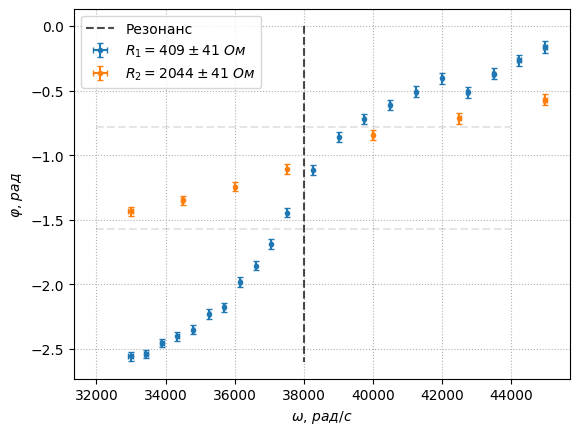

In [431]:
plt.xlabel(r"$\omega$, $рад / с$")
plt.ylabel(r"$\varphi$, $рад$")

X, Y = omega1, Dphi1
plt.errorbar(unominal(X), unominal(Y), xerr=ustdev(X), yerr=ustdev(Y), fmt=".", label=rf"$R_1 = {R1:fL} \ Ом$")

X, Y = omega2, Dphi2
plt.errorbar(unominal(X), unominal(Y), xerr=ustdev(X), yerr=ustdev(Y), fmt=".", label=rf"$R_2 = {R2:fL} \ Ом$")

plt.plot([38000, 38000], [0, -2.6], label="Резонанс", linestyle="--", color="black", alpha=0.7)
plt.plot([32000, 44000], [-np.pi / 4, -np.pi / 4], linestyle="--", color="black", alpha=0.1)
plt.plot([32000, 44000], [-np.pi / 2, -np.pi / 2], linestyle="--", color="black", alpha=0.1)

plt.legend()
plt.show()

In [432]:
Q91 = ufloat(38, 1) / ufloat(4, 1)

#### 11.

In [433]:
Q11_1 = np.mean(np.pi / Theta61)
Q11_2 = np.mean(np.pi / Theta62)
Q11_1, Q11_2

(12.140164379921659+/-0.08636691759658029,
 6.2946859923429805+/-0.1410549494626726)

#### 13.

In [434]:
table = rf'''
| $R$                  | Свободные колебания   |                      |                               | Вынужденные колебания |               |                |           |
|----------------------|-----------------------|----------------------|-------------------------------|-----------------------|---------------|----------------|-----------|
|                      | $f(L, C, R)$          | $f(\Theta)$          | Спираль                       | АЧХ                   | ФЧХ           | Нарастание     | Затухание |
| $R_1 = {R1:fL} \ Ом$ | ${Q_theor[0]:fL}$     | ${Q3[0]:fL}$         | ${Q4[0]:fL}$                  | ${Q81:fL}$            | ${Q91:fL}$    | ${Q11_1:fL}$   |     —     |
| $R_2 = {R2:fL} \ Ом$ | ${Q_theor[-1]:fL}$    | ${Q3[-1]:fL}$        | ${Q4[-1]:fL}$                 | ${Q82:fL}$            |       —       | ${Q11_2:fL}$   |     —     |
 
'''

display(Markdown(table))



| $R$                  | Свободные колебания   |                      |                               | Вынужденные колебания |               |                |           |
|----------------------|-----------------------|----------------------|-------------------------------|-----------------------|---------------|----------------|-----------|
|                      | $f(L, C, R)$          | $f(\Theta)$          | Спираль                       | АЧХ                   | ФЧХ           | Нарастание     | Затухание |
| $R_1 = 409 \pm 41 \ Ом$ | $9.3 \pm 0.9$     | $7.72 \pm 0.17$         | $7.27 \pm 0.14$                  | $7.7 \pm 0.4$            | $9.5 \pm 2.4$    | $12.14 \pm 0.09$   |     —     |
| $R_2 = 2044 \pm 41 \ Ом$ | $1.97 \pm 0.04$    | $1.57 \pm 0.06$        | $1.74 \pm 0.05$                 | $2.24 \pm 0.19$            |       —       | $6.29 \pm 0.14$   |     —     |
 
